# 🧠 DNN Class Notebook: Perceptron → XOR → MLP

**Instructor:** Ramesh Babu (Professor of Practice)

## Agenda
1. Biological inspiration → Perceptron (quick recap)
2. Perceptron as Logic Gates: AND / OR (NumPy)
3. Linear Separability & XOR failure (theory + demo)
4. Multilayer Perceptron (MLP) solves XOR (TensorFlow)
5. TensorFlow Fundamentals: tensors, ops, GradientTape

**Learning goals**: Understand **why a single perceptron fails on XOR**, how **hidden layers** fix it, and practice **TensorFlow 2.x**.


## 0) Quick Biological Inspiration → Perceptron
- **Neuron**: dendrites (inputs), soma (summation), axon (output)
- **Synapse** strength ≈ **weight** in ANNs; **bias** shifts the threshold
- **Perceptron**: $y = f(\mathbf{w}^\top \mathbf{x} + b)$ with step/sigmoid/ReLU
- **Decision boundary** in 2D is a **line** (hyperplane in higher dims)

## 1) Perceptron as Logic Gates (NumPy)
We'll hand-code a perceptron and fit it on AND and OR truth tables, which are **linearly separable**.

AND predictions: [0 0 0 1]
OR predictions : [0 1 1 1]


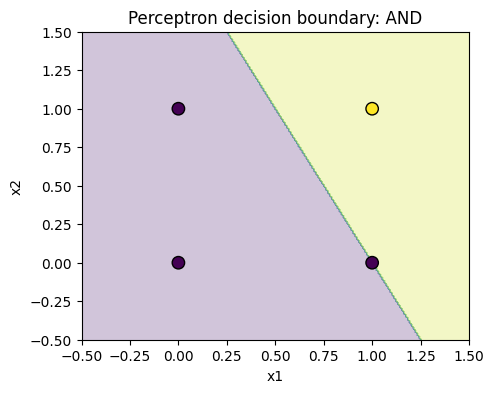

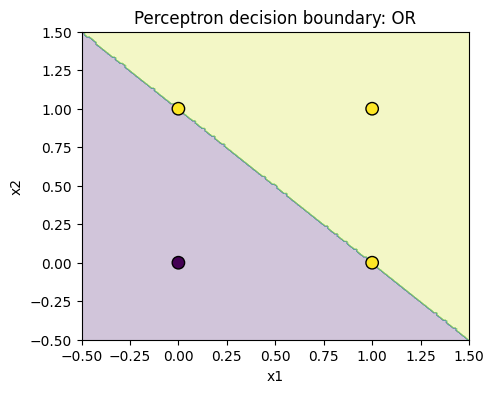

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step(z):
    return (z >= 0).astype(int)

class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        for _ in range(self.epochs):
            for i in range(n):
                z = np.dot(self.w, X[i]) + self.b
                y_hat = step(z)
                err = y[i] - y_hat
                self.w += self.lr * err * X[i]
                self.b += self.lr * err
        return self

    def predict(self, X):
        z = X @ self.w + self.b
        return step(z)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='k')
    plt.title(title)
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.show()

# Truth tables for AND/OR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
y_or  = np.array([0,1,1,1])

and_clf = Perceptron(lr=0.2, epochs=10).fit(X, y_and)
or_clf  = Perceptron(lr=0.2, epochs=10).fit(X, y_or)

print('AND predictions:', and_clf.predict(X))
print('OR predictions :', or_clf.predict(X))
plot_decision_boundary(and_clf, X, y_and, 'Perceptron decision boundary: AND')
plot_decision_boundary(or_clf,  X, y_or,  'Perceptron decision boundary: OR')

## 2) Linear Separability & XOR Failure
XOR is **not** linearly separable — you cannot draw a single straight line to separate class 0 and 1 points.

XOR predictions (Perceptron): [1 1 0 0]
Correct labels             : [0 1 1 0]


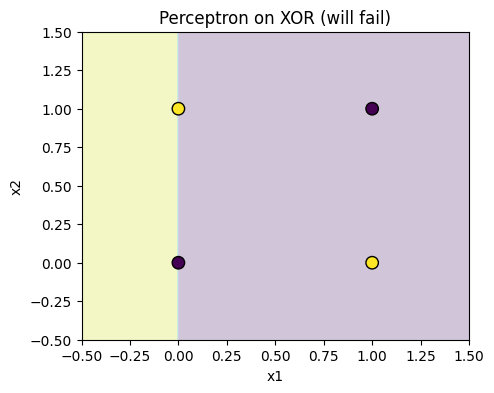

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

xor_clf = Perceptron(lr=0.2, epochs=30).fit(X, y_xor)
preds = xor_clf.predict(X)
print('XOR predictions (Perceptron):', preds)
print('Correct labels             :', y_xor)
plot_decision_boundary(xor_clf, X, y_xor, 'Perceptron on XOR (will fail)')

## 3) MLP Solves XOR (TensorFlow 2.x)
A minimal MLP with **one hidden layer** and a nonlinear activation (e.g., ReLU or sigmoid) can learn XOR.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final accuracy on XOR: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predictions: [0 1 1 0]
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step


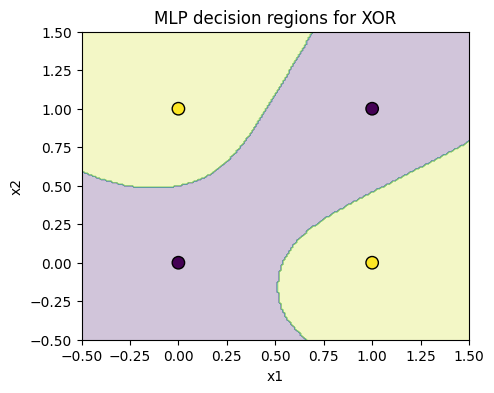

In [3]:
# This cell assumes TensorFlow 2.x is installed in your environment.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)

model = Sequential([
    Dense(4, activation='tanh', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=500, verbose=0)
print('Final accuracy on XOR:', model.evaluate(X, y, verbose=0)[1])
print('Predictions:', (model.predict(X) > 0.5).astype(int).ravel())

# Visualize learned decision regions
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
zz = (model.predict(grid) > 0.5).astype(int).reshape(xx.shape)
plt.figure(figsize=(5,4))
plt.contourf(xx, yy, zz, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=80, edgecolors='k')
plt.title('MLP decision regions for XOR')
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()

## 4) TensorFlow Fundamentals (Gradients with `tf.GradientTape`)
Quick demo: tensors, ops, and automatic differentiation.

In [4]:
import tensorflow as tf
import numpy as np

# Tensors & basic ops
a = tf.constant([[1.0, 2.0],[3.0, 4.0]])
b = tf.constant([[5.0, 6.0],[7.0, 8.0]])
print('a:\n', a.numpy())
print('b:\n', b.numpy())
print('Matrix multiply a @ b:\n', tf.matmul(a, b).numpy())

# Broadcasting
v = tf.constant([1.0, 2.0])
print('a + v (broadcast):\n', (a + v).numpy())

# Automatic differentiation
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**2 + 2*x + 1  # derivative is 2x + 2
dy_dx = tape.gradient(y, x)
print('x:', x.numpy(), ' y:', y.numpy(), ' dy/dx:', dy_dx.numpy())

a:
 [[1. 2.]
 [3. 4.]]
b:
 [[5. 6.]
 [7. 8.]]
Matrix multiply a @ b:
 [[19. 22.]
 [43. 50.]]
a + v (broadcast):
 [[2. 4.]
 [4. 6.]]
x: 3.0  y: 16.0  dy/dx: 8.0


## 5) Exercises (Optional / Take‑home)
1. Change the learning rate and epochs in the NumPy perceptron. Does convergence speed change?
2. Replace `tanh` with `ReLU` in the XOR MLP. Does it still learn?
3. Add a second hidden layer and compare the decision regions.
4. Build AND, OR, NAND perceptrons and try a two-layer hand-crafted XOR.
5. Use `GradientTape` to compute gradients for a small 2-layer network by hand and compare.

---
### Talking Points / Board Notes
- **Linear separability**: A single hyperplane ⇒ perceptron works for AND/OR, fails for XOR.
- **Nonlinearity** via hidden layers bends the decision boundary.
- **Universal Approximation**: With enough hidden units, MLPs approximate any continuous function on compact sets.

In [5]:
# Colab Notebook Cell

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Define function and derivative
def f(x):
    return x**2 + 2*x + 1

def df(x):
    return 2*x + 2

# Plot function + tangent line at chosen x0
def plot_tangent(x0=3.0):
    x_vals = np.linspace(-5, 5, 400)
    y_vals = f(x_vals)

    # Tangent line: y = f'(x0)*(x - x0) + f(x0)
    slope = df(x0)
    y0 = f(x0)
    tangent = slope * (x_vals - x0) + y0

    plt.figure(figsize=(7,5))
    plt.plot(x_vals, y_vals, label=r"$y = x^2 + 2x + 1$", color="blue")
    plt.plot(x_vals, tangent, '--', label=f"Tangent at x={x0}, slope={slope}", color="red")
    plt.scatter([x0], [y0], color="black", zorder=5)
    plt.text(x0+0.2, y0, f"({x0}, {y0:.1f})", fontsize=10)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Interactive Tangent Line Demonstration")
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider widget for x0
interact(plot_tangent, x0=(-5.0, 5.0, 0.5))


interactive(children=(FloatSlider(value=3.0, description='x0', max=5.0, min=-5.0, step=0.5), Output()), _dom_c…

<function __main__.plot_tangent(x0=3.0)>

In [6]:
import numpy as np

def step(z): return 1 if z >= 0 else 0

x1, x2 = 1, 0   # input signals
w1, w2, b = 0.6, 0.7, -0.5
z = w1*x1 + w2*x2 + b
y = step(z)

print("Weighted sum:", z)
print("Output:", y)


Weighted sum: 0.09999999999999998
Output: 1


In [7]:
import numpy as np

def perceptron(x1, x2, w1, w2, b):
    return int(w1*x1 + w2*x2 + b >= 0)

# AND Gate
print("AND:")
for x1, x2 in [(0,0),(0,1),(1,0),(1,1)]:
    print((x1,x2), "->", perceptron(x1,x2, 1, 1, -1.5))

# OR Gate
print("\nOR:")
for x1, x2 in [(0,0),(0,1),(1,0),(1,1)]:
    print((x1,x2), "->", perceptron(x1,x2, 1, 1, -0.5))


AND:
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1

OR:
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [8]:
# XOR with simple perceptron (always fails)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=10, tol=None)
clf.fit(X, y_xor)

print("Predictions:", clf.predict(X))
print("Actual     :", y_xor)


Predictions: [0 0 0 0]
Actual     : [0 1 1 0]
